
# this notebook 

- takes in a stock symbol 
- and a date range
- downloads closing prices for this range and then graphs
- graphs can be selected by a radio button


In [1]:
import sys
sys.path.append('./stockLib')

In [2]:
from stock_stuff import *

In [3]:
stock = get_info_on_stock("AMZN")

In [4]:
type (stock)

yfinance.ticker.Ticker

In [5]:
stock.info.get('zip')

'98109-5210'

In [72]:
stock.info.get('yield')

In [7]:
stock.info['zip']

'98109-5210'

In [14]:
full_list=[]
for skey in stock.info.keys():
    print(skey)
    full_list.append(skey)

zip
sector
fullTimeEmployees
longBusinessSummary
city
phone
state
country
companyOfficers
website
maxAge
address1
industry
ebitdaMargins
profitMargins
grossMargins
operatingCashflow
revenueGrowth
operatingMargins
ebitda
targetLowPrice
recommendationKey
grossProfits
freeCashflow
targetMedianPrice
currentPrice
earningsGrowth
currentRatio
returnOnAssets
numberOfAnalystOpinions
targetMeanPrice
debtToEquity
returnOnEquity
targetHighPrice
totalCash
totalDebt
totalRevenue
totalCashPerShare
financialCurrency
revenuePerShare
quickRatio
recommendationMean
exchange
shortName
longName
exchangeTimezoneName
exchangeTimezoneShortName
isEsgPopulated
gmtOffSetMilliseconds
quoteType
symbol
messageBoardId
market
annualHoldingsTurnover
enterpriseToRevenue
beta3Year
enterpriseToEbitda
52WeekChange
morningStarRiskRating
forwardEps
revenueQuarterlyGrowth
sharesOutstanding
fundInceptionDate
annualReportExpenseRatio
totalAssets
bookValue
sharesShort
sharesPercentSharesOut
fundFamily
lastFiscalYearEnd
heldPerce

In [12]:
stock.info['currentPrice']

3242.76

In [15]:
def return_shortened_list(keyword, full_list):
    short_list = []
    for the_key in full_list:
            # print(the_key)
            if keyword in the_key:
                short_list.append(the_key)
    return(short_list)

In [17]:
my_ratios = return_shortened_list('Ratio', full_list)

In [18]:
my_ratios

['currentRatio',
 'quickRatio',
 'annualReportExpenseRatio',
 'shortRatio',
 'pegRatio',
 'payoutRatio',
 'trailingPegRatio']

In [19]:
my_operating = return_shortened_list('oper', full_list)
my_operating

['operatingCashflow', 'operatingMargins']

In [20]:
my_margins = return_shortened_list('Margin', full_list)
my_margins

['ebitdaMargins', 'profitMargins', 'grossMargins', 'operatingMargins']

In [21]:
my_prices  = return_shortened_list('Price', full_list)
my_prices

['targetLowPrice',
 'targetMedianPrice',
 'currentPrice',
 'targetMeanPrice',
 'targetHighPrice',
 'navPrice',
 'strikePrice',
 'regularMarketPrice',
 'preMarketPrice']

In [22]:
def build_df(my_list):
    df_dict={}
    for stock_element in my_list:
        #print(stock_element)
        val = stock.info.get(stock_element)
        print(stock_element, val)
        df_dict[stock_element] = val
    df=pd.DataFrame(df_dict, index=[0])
    return df

In [23]:
my_price_df = build_df(my_prices)

targetLowPrice 3771
targetMedianPrice 4055
currentPrice 3242.76
targetMeanPrice 4108.8
targetHighPrice 5000
navPrice None
strikePrice None
regularMarketPrice 3242.76
preMarketPrice None


In [24]:
my_price_df

,targetLowPrice,targetMedianPrice,currentPrice,targetMeanPrice,targetHighPrice,navPrice,strikePrice,regularMarketPrice,preMarketPrice
0,3771,4055,3242.76,4108.8,5000,None,None,3242.76,None


In [25]:
my_ratio_df = build_df(my_ratios)
my_ratio_df

currentRatio 1.117
quickRatio 0.866
annualReportExpenseRatio None
shortRatio 1.2
pegRatio 2.24
payoutRatio 0
trailingPegRatio 2.0506


,currentRatio,quickRatio,annualReportExpenseRatio,shortRatio,pegRatio,payoutRatio,trailingPegRatio
0,1.117,0.866,None,1.2,2.24,0,2.0506


In [27]:
my_margin_df = build_df(my_margins)
my_margin_df

ebitdaMargins 0.1319
profitMargins 0.057350002
grossMargins 0.41307
operatingMargins 0.06178


,ebitdaMargins,profitMargins,grossMargins,operatingMargins
0,0.1319,0.05735,0.41307,0.06178


In [29]:
my_operating_df = build_df(my_operating)
my_operating_df

operatingCashflow 54671998976
operatingMargins 0.06178


,operatingCashflow,operatingMargins
0,54671998976,0.06178


In [32]:
used_items = my_operating + my_margins + my_ratios + my_prices
used_items

['operatingCashflow',
 'operatingMargins',
 'ebitdaMargins',
 'profitMargins',
 'grossMargins',
 'operatingMargins',
 'currentRatio',
 'quickRatio',
 'annualReportExpenseRatio',
 'shortRatio',
 'pegRatio',
 'payoutRatio',
 'trailingPegRatio',
 'targetLowPrice',
 'targetMedianPrice',
 'currentPrice',
 'targetMeanPrice',
 'targetHighPrice',
 'navPrice',
 'strikePrice',
 'regularMarketPrice',
 'preMarketPrice']

In [33]:
used_df = build_df(used_items)
used_df

operatingCashflow 54671998976
operatingMargins 0.06178
ebitdaMargins 0.1319
profitMargins 0.057350002
grossMargins 0.41307
operatingMargins 0.06178
currentRatio 1.117
quickRatio 0.866
annualReportExpenseRatio None
shortRatio 1.2
pegRatio 2.24
payoutRatio 0
trailingPegRatio 2.0506
targetLowPrice 3771
targetMedianPrice 4055
currentPrice 3242.76
targetMeanPrice 4108.8
targetHighPrice 5000
navPrice None
strikePrice None
regularMarketPrice 3242.76
preMarketPrice None


,operatingCashflow,operatingMargins,ebitdaMargins,profitMargins,grossMargins,currentRatio,quickRatio,annualReportExpenseRatio,shortRatio,pegRatio,...,trailingPegRatio,targetLowPrice,targetMedianPrice,currentPrice,targetMeanPrice,targetHighPrice,navPrice,strikePrice,regularMarketPrice,preMarketPrice
0,54671998976,0.06178,0.1319,0.05735,0.41307,1.117,0.866,None,1.2,2.24,...,2.0506,3771,4055,3242.76,4108.8,5000,None,None,3242.76,None


In [34]:
p_list=full_list

In [35]:
for i in used_items:
    print(i)
    if i in p_list:
        p_list.remove(i)
    else:
        print('nope')

operatingCashflow
operatingMargins
ebitdaMargins
profitMargins
grossMargins
operatingMargins
nope
currentRatio
quickRatio
annualReportExpenseRatio
shortRatio
pegRatio
payoutRatio
trailingPegRatio
targetLowPrice
targetMedianPrice
currentPrice
targetMeanPrice
targetHighPrice
navPrice
strikePrice
regularMarketPrice
preMarketPrice


In [36]:
p_list

['zip',
 'sector',
 'fullTimeEmployees',
 'longBusinessSummary',
 'city',
 'phone',
 'state',
 'country',
 'companyOfficers',
 'website',
 'maxAge',
 'address1',
 'industry',
 'revenueGrowth',
 'ebitda',
 'recommendationKey',
 'grossProfits',
 'freeCashflow',
 'earningsGrowth',
 'returnOnAssets',
 'numberOfAnalystOpinions',
 'debtToEquity',
 'returnOnEquity',
 'totalCash',
 'totalDebt',
 'totalRevenue',
 'totalCashPerShare',
 'financialCurrency',
 'revenuePerShare',
 'recommendationMean',
 'exchange',
 'shortName',
 'longName',
 'exchangeTimezoneName',
 'exchangeTimezoneShortName',
 'isEsgPopulated',
 'gmtOffSetMilliseconds',
 'quoteType',
 'symbol',
 'messageBoardId',
 'market',
 'annualHoldingsTurnover',
 'enterpriseToRevenue',
 'beta3Year',
 'enterpriseToEbitda',
 '52WeekChange',
 'morningStarRiskRating',
 'forwardEps',
 'revenueQuarterlyGrowth',
 'sharesOutstanding',
 'fundInceptionDate',
 'totalAssets',
 'bookValue',
 'sharesShort',
 'sharesPercentSharesOut',
 'fundFamily',
 'last

In [37]:
nums = []
non_nums = []
for i in p_list:
    val = stock.info.get(i)
    try:
        j=float(val)
        nums.append(i)
    except:
        print(i, 'likey not a number')
        non_nums.append(i)
    

zip likey not a number
sector likey not a number
longBusinessSummary likey not a number
city likey not a number
phone likey not a number
state likey not a number
country likey not a number
companyOfficers likey not a number
website likey not a number
address1 likey not a number
industry likey not a number
recommendationKey likey not a number
financialCurrency likey not a number
exchange likey not a number
shortName likey not a number
longName likey not a number
exchangeTimezoneName likey not a number
exchangeTimezoneShortName likey not a number
quoteType likey not a number
symbol likey not a number
messageBoardId likey not a number
market likey not a number
annualHoldingsTurnover likey not a number
beta3Year likey not a number
morningStarRiskRating likey not a number
revenueQuarterlyGrowth likey not a number
fundInceptionDate likey not a number
totalAssets likey not a number
fundFamily likey not a number
lastDividendValue likey not a number
yield likey not a number
threeYearAverageRetu

In [38]:
t_df = build_df(['zip','sector'])
t_df

zip 98109-5210
sector Consumer Cyclical


,zip,sector
0,98109-5210,Consumer Cyclical


In [39]:
non_nums.remove('longBusinessSummary')


In [40]:
non_nums.remove('companyOfficers')


In [41]:
text_df = build_df(non_nums)
text_df

zip 98109-5210
sector Consumer Cyclical
city Seattle
phone 206-266-1000
state WA
country United States
website https://www.amazon.com
address1 410 Terry Avenue North
industry Internet Retail
recommendationKey buy
financialCurrency USD
exchange NMS
shortName Amazon.com, Inc.
longName Amazon.com, Inc.
exchangeTimezoneName America/New_York
exchangeTimezoneShortName EST
quoteType EQUITY
symbol AMZN
messageBoardId finmb_18749
market us_market
annualHoldingsTurnover None
beta3Year None
morningStarRiskRating None
revenueQuarterlyGrowth None
fundInceptionDate None
totalAssets None
fundFamily None
lastDividendValue None
yield None
threeYearAverageReturn None
lastSplitFactor 2:1
legalType None
lastDividendDate None
morningStarOverallRating None
ytdReturn None
lastCapGain None
impliedSharesOutstanding None
category None
fiveYearAverageReturn None
trailingAnnualDividendYield None
volume24Hr None
trailingAnnualDividendRate None
toCurrency None
expireDate None
algorithm None
dividendRate None
exDivi

,zip,sector,city,phone,state,country,website,address1,industry,recommendationKey,...,startDate,currency,lastMarket,maxSupply,openInterest,volumeAllCurrencies,fromCurrency,fiveYearAvgDividendYield,dividendYield,logo_url
0,98109-5210,Consumer Cyclical,Seattle,206-266-1000,WA,United States,https://www.amazon.com,410 Terry Avenue North,Internet Retail,buy,...,None,USD,None,None,None,None,None,None,None,https://logo.clearbit.com/amazon.com


In [42]:
nums_df = build_df(nums)
nums_df

fullTimeEmployees 1468000
maxAge 1
revenueGrowth 0.153
ebitda 60403998720
grossProfits 152757000000
freeCashflow 9271374848
earningsGrowth -0.505
returnOnAssets 0.05321
numberOfAnalystOpinions 51
debtToEquity 113.001
returnOnEquity 0.25832
totalCash 78988001280
totalDebt 136237998080
totalRevenue 457965010944
totalCashPerShare 155.75
revenuePerShare 909.112
recommendationMean 1.7
isEsgPopulated False
gmtOffSetMilliseconds -18000000
enterpriseToRevenue 3.716
enterpriseToEbitda 28.174
52WeekChange 0.039093018
forwardEps 51.16
sharesOutstanding 507148000
bookValue 237.799
sharesShort 3567450
sharesPercentSharesOut 0.0069999998
lastFiscalYearEnd 1609372800
heldPercentInstitutions 0.59265
netIncomeToCommon 26262999040
trailingEps 51.099
SandP52WeekChange 0.22741783
priceToBook 13.636559
heldPercentInsiders 0.13356
nextFiscalYearEnd 1672444800
mostRecentQuarter 1632960000
sharesShortPreviousMonthDate 1638230400
floatShares 456295928
beta 1.095793
enterpriseValue 1701808046080
priceHint 2
las

,fullTimeEmployees,maxAge,revenueGrowth,ebitda,grossProfits,freeCashflow,earningsGrowth,returnOnAssets,numberOfAnalystOpinions,debtToEquity,...,dayLow,ask,askSize,volume,fiftyTwoWeekHigh,fiftyTwoWeekLow,bid,tradeable,bidSize,dayHigh
0,1468000,1,0.153,60403998720,152757000000,9271374848,-0.505,0.05321,51,113.001,...,3196.01,3242,1400,2298743,3773.08,2881,3238,False,2900,3244.9778


In [43]:
hist = stock.history(period="max")["Close"]
print(hist.head())

Date
1997-05-15    1.958333
1997-05-16    1.729167
1997-05-19    1.708333
1997-05-20    1.635417
1997-05-21    1.427083
Name: Close, dtype: float64


In [44]:
hist

Date
1997-05-15       1.958333
1997-05-16       1.729167
1997-05-19       1.708333
1997-05-20       1.635417
1997-05-21       1.427083
                 ...     
2022-01-10    3229.719971
2022-01-11    3307.239990
2022-01-12    3304.139893
2022-01-13    3224.280029
2022-01-14    3242.760010
Name: Close, Length: 6210, dtype: float64

In [45]:
type(hist)

pandas.core.series.Series

In [46]:
df = hist.to_frame()

In [47]:
df

,Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635417
1997-05-21,1.427083
...,...
2022-01-10,3229.719971
2022-01-11,3307.239990
2022-01-12,3304.139893


In [48]:
df.iloc[-1]['Close']

3242.760009765625

In [49]:
my_hist = stock.history()

In [50]:
my_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-12-15,3371.959961,3472.000000,3303.899902,3466.300049,3789700,0,0
2021-12-16,3467.370117,3483.320068,3363.209961,3377.419922,3043800,0,0
2021-12-17,3354.209961,3417.969971,3312.270020,3400.350098,4277100,0,0
2021-12-20,3337.000000,3357.489990,3312.000000,3341.580078,2868600,0,0
2021-12-21,3357.010010,3414.330078,3312.949951,3408.340088,2797800,0,0
2021-12-22,3385.399902,3441.000000,3370.010010,3420.739990,2751800,0,0
2021-12-23,3408.560059,3439.500000,3403.000000,3421.370117,1839400,0,0
2021-12-27,3420.739990,3458.860107,3384.310059,3393.389893,2934400,0,0
2021-12-28,3403.649902,3443.520020,3382.709961,3413.219971,2731900,0,0


In [74]:
my_hist['Close']

Date
2021-12-15    3466.300049
2021-12-16    3377.419922
2021-12-17    3400.350098
2021-12-20    3341.580078
2021-12-21    3408.340088
2021-12-22    3420.739990
2021-12-23    3421.370117
2021-12-27    3393.389893
2021-12-28    3413.219971
2021-12-29    3384.020020
2021-12-30    3372.889893
2021-12-31    3334.340088
2022-01-03    3408.090088
2022-01-04    3350.439941
2022-01-05    3287.139893
2022-01-06    3265.080078
2022-01-07    3251.080078
2022-01-10    3229.719971
2022-01-11    3307.239990
2022-01-12    3304.139893
2022-01-13    3224.280029
2022-01-14    3242.760010
Name: Close, dtype: float64

In [77]:
my_hist.reset_index(inplace=True)
my_hist

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2021-12-15,3371.959961,3472.000000,3303.899902,3466.300049,3789700,0,0
1,1,2021-12-16,3467.370117,3483.320068,3363.209961,3377.419922,3043800,0,0
2,2,2021-12-17,3354.209961,3417.969971,3312.270020,3400.350098,4277100,0,0
3,3,2021-12-20,3337.000000,3357.489990,3312.000000,3341.580078,2868600,0,0
4,4,2021-12-21,3357.010010,3414.330078,3312.949951,3408.340088,2797800,0,0
5,5,2021-12-22,3385.399902,3441.000000,3370.010010,3420.739990,2751800,0,0
6,6,2021-12-23,3408.560059,3439.500000,3403.000000,3421.370117,1839400,0,0
7,7,2021-12-27,3420.739990,3458.860107,3384.310059,3393.389893,2934400,0,0
8,8,2021-12-28,3403.649902,3443.520020,3382.709961,3413.219971,2731900,0,0
9,9,2021-12-29,3416.800049,3424.239990,3372.010010,3384.020020,1787700,0,0


In [13]:
# import panel as pn
# pn.extension()

In [78]:
import bokeh
# bokeh.sampledata.download()

In [79]:
import panel as pn
import pandas as pd
from matplotlib.figure import Figure
# not needed for mpl >= 3.1
from matplotlib.backends.backend_agg import FigureCanvas

from bokeh.sampledata import stocks

pn.extension(sizing_mode="stretch_width")

In [90]:
title = '## Stock Explorer Matplotlib'

tickers = ['AAPL', 'FB', 'GOOG', 'IBM', 'MSFT']
tickers = ['AMZN']

def get_df(ticker, window_size):
    #df = pd.DataFrame(getattr(stocks, ticker))
    hist = stock.history(period="max")["Close"]
    df = hist.to_frame()

    df.reset_index(inplace=True)
    
    df['Date'] = pd.to_datetime(df.Date)
    print(df['Date'])
    return (df)

def get_plot(ticker, window_size):
    fig = Figure(figsize=(10, 6))
    ax = fig.subplots()
    FigureCanvas(fig)  # not needed for mpl >= 3.1
    df = get_df(ticker, window_size)
    df.plot.line(x='Date', y='Close', ax=ax)
    return fig

0      1997-05-15
1      1997-05-16
2      1997-05-19
3      1997-05-20
4      1997-05-21
          ...    
6205   2022-01-10
6206   2022-01-11
6207   2022-01-12
6208   2022-01-13
6209   2022-01-14
Name: Date, Length: 6210, dtype: datetime64[ns]


Row(sizing_mode='stretch_width')
    [0] Column(sizing_mode='fixed', width=300)
        [0] Column(margin=5, name='StockExplorer', sizing_mode='stretch_width', width=300)
            [0] StaticText(sizing_mode='stretch_width', value='<b>StockExplorer</b>')
            [1] Select(name='Ticker', options=OrderedDict([('AMZN', ...]), sizing_mode='stretch_width', value='AMZN')
            [2] IntSlider(end=21, name='Window size', sizing_mode='stretch_width', start=1, value=6)
    [1] ParamMethod(method, sizing_mode='stretch_width')
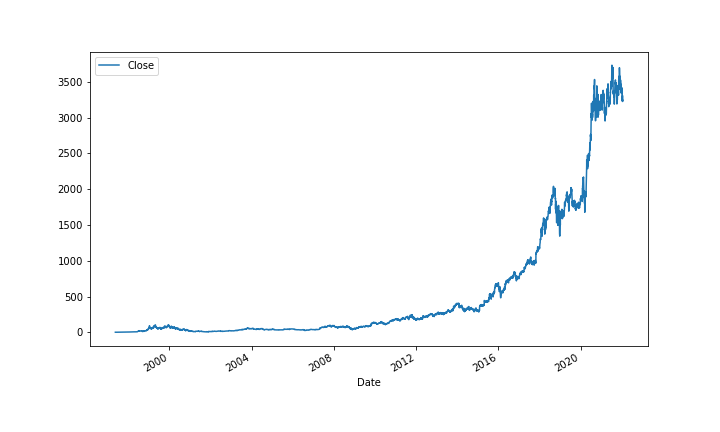

In [92]:
import param

class StockExplorer(param.Parameterized):
    
    ticker = param.Selector(default='AMZN', objects=tickers)
    
    window_size = param.Integer(default=6, bounds=(1, 21))
    
    @param.depends('ticker', 'window_size')
    def plot(self):
        return get_plot(self.ticker, self.window_size)
    
explorer = StockExplorer()
pn.Row(pn.Column(explorer.param, sizing_mode="fixed", width=300), explorer.plot)

In [93]:
my_hist.describe()

,index,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,22.000000,22.000000,22.000000,22.000000,22.000000,2.200000e+01,22.0,22.0
mean,10.500000,3346.375000,3382.258201,3303.682273,3345.633190,2.858191e+06,0.0,0.0
std,6.493587,71.394917,71.758412,71.769270,71.646894,6.997675e+05,0.0,0.0
min,0.000000,3203.000000,3233.229980,3126.090088,3224.280029,1.787700e+06,0.0,0.0
25%,5.250000,3311.632507,3329.640015,3252.250061,3291.389893,2.415850e+06,0.0,0.0
50%,10.500000,3355.609985,3414.200073,3312.609985,3361.664917,2.774800e+06,0.0,0.0
75%,15.750000,3401.237427,3436.625000,3368.309998,3406.155090,3.167075e+06,0.0,0.0
max,21.000000,3467.370117,3483.320068,3403.000000,3466.300049,4.389900e+06,0.0,0.0


In [95]:
my_hist.std()['Close']

71.6468940778592

In [97]:
df.std()['Close']

895.4811331283157

In [107]:
my_mean = my_hist['Close'].mean()

In [108]:
my_min = my_hist['Close'].min()

In [109]:
my_max = my_hist['Close'].max()

In [110]:
my_std = my_hist['Close'].std()

In [111]:
max_std = (my_max - my_mean)/my_std

In [112]:
max_std

1.6841882760298992

In [113]:
min_std = (my_min - my_mean)/my_std

In [114]:
min_std

-1.693767218708576

In [115]:
pct = my_std/my_mean

In [116]:
pct

0.021415047619720014

In [117]:
my_mean

3345.6331898082385

In [118]:
my_max

3466.300048828125

In [119]:
my_min

3224.280029296875